<a href="https://colab.research.google.com/github/ng328/ML-DL_Projects/blob/main/MNIST_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

#https://keras.io/api/datasets/fashion_mnist/

'''Loads the Fashion-MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:'''


In [ ]:
mnist=tf.keras.datasets.fashion_mnist

In [ ]:
#print(mnist)

In [ ]:
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(training_images.shape)

(60000, 28, 28)


In [ ]:
print(test_images.shape)

(10000, 28, 28)


In [ ]:
print(training_labels.shape)

(60000,)


In [ ]:
print(test_labels.shape)

(10000,)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

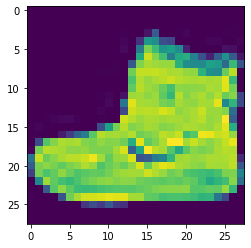

In [ ]:
#multiclass classification-->
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=300)
plt.imshow(training_images[0])
training_labels[0]
training_images[0]


In [ ]:
#Normalization
training_images=training_images/255
test_images=test_images/255

In [ ]:
#architecuture

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [ ]:
#compile
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
60000/32

1875.0

In [ ]:
model.fit(training_images,training_labels,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0462 - accuracy: 0.9826
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0482 - accuracy: 0.9820
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9823
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9823
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9829
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9839
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0466 - accuracy: 0.9829
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.9838
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0459 - accuracy: 0.9835
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.048

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8825


[0.3435904085636139, 0.8824999928474426]

In [ ]:
1875/60000

0.03125

In [ ]:
#callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.9):
      print("\n Reached Desired accuracy(90%) so cancelling training")
      self.model.stop_training=True

Callbacks=myCallback()
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)])



In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_images,training_labels,epochs=100,callbacks=[Callbacks])

Epoch 1/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8706 - accuracy: 0.7175
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5478 - accuracy: 0.8038
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4888 - accuracy: 0.8267
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4571 - accuracy: 0.8379
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4361 - accuracy: 0.8455
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4205 - accuracy: 0.8508
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4074 - accuracy: 0.8562
Epoch 8/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3975 - accuracy: 0.8592
Epoch 9/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3878 - accuracy: 0.8617
Epoch 10/100
1875/1875 [==============================] - 11s 6m